In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as sts
#from scipy.stats import linregress
from pprint import pprint
#import warnings
#warnings.filterwarnings('ignore')
#import ipywidgets as widgets
%matplotlib inline


In [2]:
#%pip install citipy

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


594

In [ ]:
##cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
#Parameter for the API call
##api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
##parameters={'appid':api_key_weather, "units":"imperial"}
##results = []
#contentType ='json'
#loop through the list of cities and perform a request for weather data for each city
##for city in cities:
    ##parameters['q']=city
    ##response = requests.get(cityurl, params=parameters)
    ##weatherjson=response.json()
    ##if weatherjson['cod']==200:
        ##results.append(response)
    ##else:
        ##if weatherjson['cod']==404:
            ##print('Data not available')

##time.sleep(5)
#display(results)

In [5]:
#set up list to hold response info
results = []
counter = 0
cityurl = "http://api.openweathermap.org/data/2.5/weather?"
#city = "london" 
api_key_weather = "ce3f01dd4d23d07b4cfb5ca82f3ea6e5"
parameters={'appid':api_key_weather, "units":"imperial"}


for city in cities:
    parameters['q']=city
    response = requests.get(cityurl, params=parameters).json()

    #try/except statement to handle errors when city is not found on openweather site
    try:
        #create dictionary
        city_data = {
            "City": response['name'],
            "Lat": response['coord']['lat'],
            "Lng": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
            "Date": response['dt']
        }
        results.append(city_data)
        counter = counter + 1
        print(f"{counter} City Name: {response['name']} / ID:{response['id']}")
    except:
        print("Missing city | " + city)


1 City Name: Ushuaia / ID:3833367
2 City Name: Bluff / ID:2206939
3 City Name: Rikitea / ID:4030556
4 City Name: Punta Arenas / ID:3874787
5 City Name: Vaini / ID:4032243
6 City Name: Cabo San Lucas / ID:3985710
7 City Name: Hermanus / ID:3366880
8 City Name: Olafsvik / ID:3414079
9 City Name: Bethel / ID:5282297
10 City Name: Klerksdorp / ID:989921
11 City Name: Severobaykal'sk / ID:2016910
12 City Name: Mar del Plata / ID:3430863
13 City Name: Khatanga / ID:2022572
14 City Name: Albany / ID:5106841
15 City Name: Saldanha / ID:3361934
16 City Name: Longyearbyen / ID:2729907
17 City Name: Flin Flon / ID:5954718
Missing city | rungata
18 City Name: Riyadh / ID:108410
19 City Name: Saint-Leu / ID:6690297
20 City Name: Saskylakh / ID:2017155
21 City Name: Sola / ID:2134814
22 City Name: Ak-Dovurak / ID:1512064
23 City Name: Cayenne / ID:3382160
24 City Name: Nanortalik / ID:3421765
25 City Name: Yulara / ID:6355222
26 City Name: Esperance / ID:2071860
27 City Name: Cape Town / ID:3369157


213 City Name: Bol / ID:2434979
Missing city | tumannyy
Missing city | nizhneyansk
214 City Name: Thanh Hoa / ID:1566166
215 City Name: Angoche / ID:1052944
216 City Name: Brae / ID:2654970
217 City Name: Jiangyou / ID:1885823
218 City Name: Labuhan / ID:8079926
219 City Name: Antofagasta / ID:3899539
220 City Name: Buraidah / ID:107304
221 City Name: Ketchikan / ID:5554428
222 City Name: Follonica / ID:6541106
223 City Name: Flinders / ID:6255012
224 City Name: Norman Wells / ID:6089245
225 City Name: Ust'-Karsk / ID:2013942
226 City Name: Calderitas / ID:3531816
227 City Name: Castro / ID:3466704
228 City Name: Vestmannaeyjar / ID:3412093
229 City Name: Punta Alta / ID:3839982
230 City Name: Sémbé / ID:2255304
231 City Name: Fayaoué / ID:2141305
232 City Name: Baykit / ID:1510689
233 City Name: Laguna / ID:5364271
234 City Name: Verkhnedneprovskiy / ID:475614
235 City Name: Colesberg / ID:1013076
236 City Name: Farafangana / ID:1065158
237 City Name: Dingle / ID:1714733
238 City Name

423 City Name: Novy Urengoy / ID:1496511
424 City Name: Grindavik / ID:3416888
425 City Name: Yar-Sale / ID:1486321
426 City Name: Bolzano / ID:3181913
427 City Name: Rockland / ID:5134189
428 City Name: Bograd / ID:1509847
429 City Name: Tateyama / ID:1850523
430 City Name: Mitsamiouli / ID:921786
Missing city | ondorhaan
431 City Name: Healesville / ID:2163701
432 City Name: Niihama / ID:1855425
433 City Name: Rach Gia / ID:1568510
434 City Name: Dubai / ID:292223
435 City Name: Kapoeta / ID:372884
436 City Name: Neiafu / ID:4032420
437 City Name: Mitú / ID:3674676
438 City Name: Plettenberg Bay / ID:964712
Missing city | ambodifototra
439 City Name: Nālūt / ID:2214432
440 City Name: Hūn / ID:2216645
441 City Name: Yaguarón / ID:3436674
442 City Name: Williston / ID:5692947
443 City Name: Verkhnevilyuysk / ID:2013639
444 City Name: Pitkyaranta / ID:509234
445 City Name: Kabinda / ID:215527
446 City Name: Arrondissement de Morlaix / ID:2991771
447 City Name: Mandera / ID:187896
448 Ci

In [6]:

# latitude=[response.get('coord').get('lat') for response in results]
# longitude=[response.get('coord').get('lon') for response in results]
# Country=[response.get('sys').get('country') for response in results]
# Date=[response.get('dt') for response in results]
# Temperature=[response.get('main').get('temp_max') for response in results]
# Humidity=[response.get('main').get('humidity') for response in results]
# Cloudiness=[response.get('clouds').get('all') for response in results]
# Wind_Speed=[response.get('wind').get('speed') for response in results]
# city=[response.get('name') for response in results]


In [7]:
# # Create a DataFrame.
city_df = pd.DataFrame(results)
city_df
# write to output file
city_df.to_csv("weatherhome.csv", index=False)                      

In [7]:
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-0.18,90,100,29.48,RU,1613180513
1,Khatanga,71.9667,102.5000,-26.37,86,100,8.12,RU,1613180513
2,Mehamn,71.0357,27.8492,16.05,95,53,6.76,NO,1613180514
3,Mugur-Aksy,50.3500,90.5000,-8.63,78,2,4.88,RU,1613180514
4,Aksarka,66.5606,67.7975,-23.39,86,100,4.56,RU,1613180515
...,...,...,...,...,...,...,...,...,...
565,Brae,60.3964,-1.3530,37.40,48,90,27.63,GB,1613180582
566,Kampot,10.6167,104.1833,80.60,88,40,1.14,KH,1613180799
567,Namatanai,-3.6667,152.4333,85.28,69,74,6.44,PG,1613180799
568,Alugan,12.2188,125.4808,81.21,81,50,0.67,PH,1613180799


The scatter plot shows cloudiness


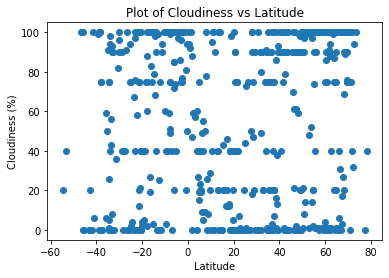

In [8]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.title('Plot of Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print("The scatter plot shows cloudiness")

The scatter plot vvvvvv


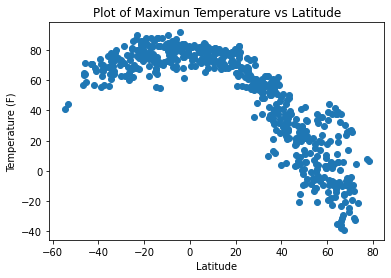

In [9]:
plt.scatter(city_df["Lat"], city_df["Max Temp"])
plt.title('Plot of Maximun Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


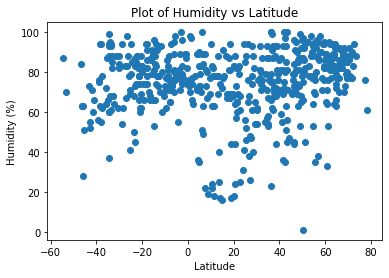

In [10]:
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.title('Plot of Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print("The scatter plot vvvvvv")

The scatter plot vvvvvv


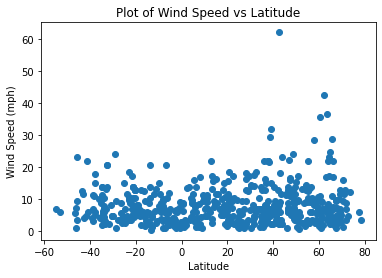

In [11]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"])
plt.title('Plot of Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print("The scatter plot vvvvvv")

In [12]:
northhemisp=city_df.loc[city_df["Lat"]>0]
northhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Cabo San Lucas,22.8909,-109.9124,68.00,68,1,10.36,MX,1613266168
7,Olafsvik,64.8945,-23.7142,39.13,74,100,24.56,IS,1613266201
8,Bethel,41.3712,-73.4140,26.60,36,90,4.61,US,1613266202
10,Severobaykal'sk,55.6500,109.3167,-5.62,88,100,2.39,RU,1613266202
12,Khatanga,71.9667,102.5000,-32.37,83,32,6.91,RU,1613266202
...,...,...,...,...,...,...,...,...,...
545,Ugoofaaru,5.6667,73.0000,80.31,70,19,7.61,MV,1613266273
546,Road Town,18.4167,-64.6167,78.80,69,40,14.97,VG,1613266007
547,Roanoke Rapids,36.4615,-77.6542,33.01,100,90,8.05,US,1613266273
549,Lødingen,68.4140,15.9951,24.01,92,90,3.31,NO,1613266273


In [13]:
southhemisp=city_df.loc[city_df["Lat"]<0]
southhemisp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,41.00,87,20,6.91,AR,1613266121
1,Bluff,-46.6000,168.3333,56.59,84,100,5.50,NZ,1613266116
2,Rikitea,-23.1203,-134.9692,80.17,73,97,10.45,PF,1613266201
3,Punta Arenas,-53.1500,-70.9167,44.60,70,40,5.75,CL,1613265907
4,Vaini,-21.2000,-175.2000,86.00,74,20,10.36,TO,1613266201
...,...,...,...,...,...,...,...,...,...
529,Sambava,-14.2667,50.1667,75.51,88,68,5.66,MG,1613266271
532,Okato,-39.2000,173.8833,73.99,56,99,4.00,NZ,1613266272
540,Touros,-5.1989,-35.4608,80.60,78,40,6.91,BR,1613266237
543,Nelson Bay,-32.7167,152.1500,73.40,68,90,20.71,AU,1613266116


The correlation coeficient r for Maximum TEMPERATURE (N) is: -0.8862698890095473
The correlation coeficient r for HUMIDITY (N) is: 0.30741138730345835
The correlation coeficient r for CLOUDINESS (N) is: 0.2504801740673587
The correlation coeficient r for WIND SPEED (N) is: 0.06320510549755105
The correlation coeficient r for Maximum TEMPERATURE (S) is: 0.5516657381152825
The correlation coeficient r for HUMIDITY (S) is: 0.2265745902139138
The correlation coeficient r for CLOUDINESS (S) is: 0.28262119920076917
The correlation coeficient r for WIND SPEED (S) is: -0.22679101145824848


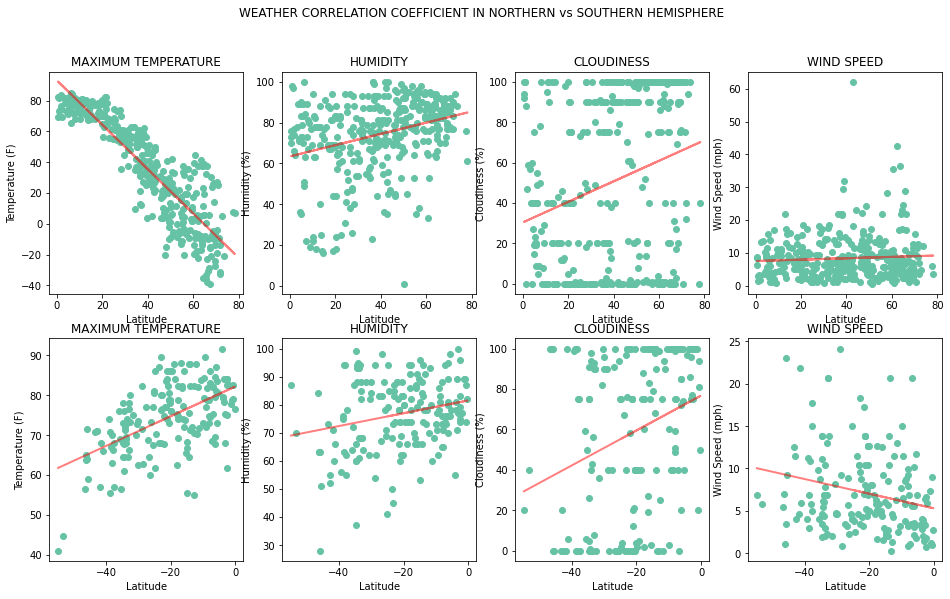

In [14]:
# Run linear regression on each relationship: 
fig,ax = plt.subplots(2,4, figsize=(16,9))
fig.suptitle('WEATHER CORRELATION COEFFICIENT IN NORTHERN vs SOUTHERN HEMISPHERE')

#NORTHERN HEMISPHERE:
#Northen Hemisphere- Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Max Temp'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][0].scatter(northhemisp['Lat'], northhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][0].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][0].title.set_text('MAXIMUM TEMPERATURE')
ax[0][0].set_ylabel('Temperature (F)')
ax[0][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Max Temp'])[0]))

#Northen Hemisphere- Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Humidity'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][1].scatter(northhemisp['Lat'], northhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][1].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][1].title.set_text('HUMIDITY')
ax[0][1].set_ylabel('Humidity (%)')
ax[0][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Humidity'])[0]))

#Northen Hemisphere- Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Cloudiness'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][2].scatter(northhemisp['Lat'], northhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][2].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][2].title.set_text('CLOUDINESS')
ax[0][2].set_ylabel('Cloudiness (%)')
ax[0][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Cloudiness'])[0]))

#Northen Hemisphere- wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northhemisp['Lat'],northhemisp['Wind Speed'])
regress_line = northhemisp['Lat']*slope + intercept
ax[0][3].scatter(northhemisp['Lat'], northhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[0][3].plot(northhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[0][3].title.set_text('WIND SPEED')
ax[0][3].set_ylabel('Wind Speed (mph)')
ax[0][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (N) is: "+str(sts.pearsonr(northhemisp['Lat'],northhemisp['Wind Speed'])[0]))

#SOUTHERN HEMISPHERE
#Southern Hemisphere - Temperature(F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Max Temp'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][0].scatter(southhemisp['Lat'], southhemisp['Max Temp'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][0].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][0].title.set_text('MAXIMUM TEMPERATURE')
ax[1][0].set_ylabel('Temperature (F)')
ax[1][0].set_xlabel('Latitude')
print("The correlation coeficient r for Maximum TEMPERATURE (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Max Temp'])[0]))

#Southern Hemisphere - Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Humidity'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][1].scatter(southhemisp['Lat'], southhemisp['Humidity'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][1].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][1].title.set_text('HUMIDITY')
ax[1][1].set_ylabel('Humidity (%)')
ax[1][1].set_xlabel('Latitude')
print("The correlation coeficient r for HUMIDITY (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Humidity'])[0]))

#Southern Hemisphere - Cloudiness(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Cloudiness'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][2].scatter(southhemisp['Lat'], southhemisp['Cloudiness'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][2].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][2].title.set_text('CLOUDINESS')
ax[1][2].set_ylabel('Cloudiness (%)')
ax[1][2].set_xlabel('Latitude')
print("The correlation coeficient r for CLOUDINESS (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Cloudiness'])[0]))

#Southern Hemisphere - wind Speed(mph) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southhemisp['Lat'],southhemisp['Wind Speed'])
regress_line = southhemisp['Lat']*slope + intercept
ax[1][3].scatter(southhemisp['Lat'], southhemisp['Wind Speed'] ,color= plt.get_cmap('Set2').colors[0])
ax[1][3].plot(southhemisp['Lat'],regress_line,  c='r', linewidth=2, alpha =0.5)
ax[1][3].title.set_text('WIND SPEED')
ax[1][3].set_ylabel('Wind Speed (mph)')
ax[1][3].set_xlabel('Latitude')
print("The correlation coeficient r for WIND SPEED (S) is: "+str(sts.pearsonr(southhemisp['Lat'],southhemisp['Wind Speed'])[0]))
